<a href="https://colab.research.google.com/github/amfakh/FGA-Project/blob/master/Titanic%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Matplotlib 3.1.0

Pada versi 3.1.1, Confusion Matrix tidak tampil dengan benar, maka harus didowngrade ke 3.1.0

Setelah selesai, runtime harus direstart

In [ ]:
!pip install matplotlib==3.1.0

## Sambungkan ke Google Drive

Karena datasetnya saya simpan di Google Drive maka ini perlu dilakukan 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Library

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn import preprocessing

%matplotlib inline

## Baca csv

In [ ]:
df = pd.read_csv('/content/drive/My Drive/MACHINE LEARNING/21 Project Machine Learning/Dataset/titanic.csv')

# Preprocess

## Lihat Data

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Replace Data String Menjadi Integer

In [ ]:
df['Sex'].replace(['male', 'female'], [0,1], inplace=True)
df['Embarked'].replace(['S', 'C', 'Q'], [0,1,2], inplace=True)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0


## Mengecek Ukuran Dataset (Sebelum Praproses)

In [ ]:
df.shape

(891, 12)

## Mengecek Keberadaan Data yang Null

In [ ]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

## Drop Row yang Null

In [ ]:
df.dropna(subset=['Age', 'Embarked'], inplace=True)

## Mengecek Ukuran Dataset (Setelah Praproses)

In [ ]:
df.shape

(712, 12)

## Data Visualization

Text(0, 0.5, 'Total')

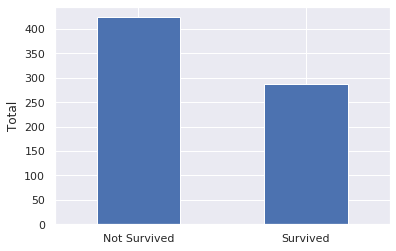

In [ ]:
survived = df['Survived'].value_counts().plot(kind='bar')

group_labels = ['Not Survived', 'Survived']
survived.set_xticklabels(group_labels)

plt.xticks(rotation=0)
plt.ylabel("Total")

Text(0, 0.5, 'Total')

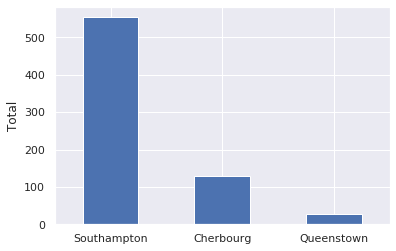

In [ ]:
embarked = df['Embarked'].value_counts().plot(kind='bar')

group_labels = ['Southampton', 'Cherbourg', 'Queenstown']
embarked.set_xticklabels(group_labels)

plt.xticks(rotation=0)
plt.ylabel("Total")

## Train Test Split

In [ ]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']] .values  #.astype(float)
X[0:5]

array([[ 3.,  0., 22.,  1.,  0.,  0.],
       [ 1.,  1., 38.,  1.,  0.,  1.],
       [ 3.,  1., 26.,  0.,  0.,  0.],
       [ 1.,  1., 35.,  1.,  0.,  0.],
       [ 3.,  0., 35.,  0.,  0.,  0.]])

In [ ]:
y = df['Survived'].values
y[0:5]

array([0, 1, 1, 1, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (569, 6) (569,)
Test set: (143, 6) (143,)


# Klasifikasi KNN

## Import Library

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

## Cek k terbaik

In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.68531469, 0.70629371, 0.79020979, 0.74825175, 0.79020979,
       0.77622378, 0.76923077, 0.74125874, 0.77622378])

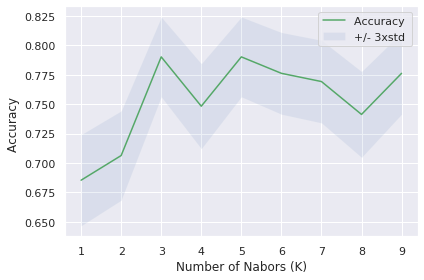

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "Akurasi terbaik adalah ", mean_acc.max(), "dengan k=", mean_acc.argmax()+1) 

Akurasi terbaik adalah  0.7902097902097902 dengan k= 3


## Training

In [ ]:
k = 3

neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

## Predicting

In [ ]:
yhat = neigh.predict(X_test)
yhat[0:50]

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0])

## Cek Akurasi

In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8664323374340949
Test set Accuracy:  0.7902097902097902


## Cek Confusion Matrix

Text(0.5, 1, 'Confusion Matrix Prediction')

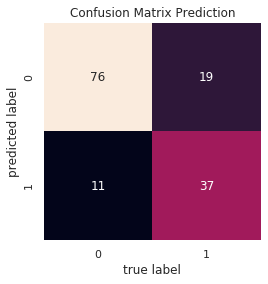

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion = confusion_matrix(y_test, yhat)

sns.set()
sns.heatmap(confusion.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=np.unique(yhat),
            yticklabels=np.unique(yhat))
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix Prediction')

## Cek Accuracy, Precision, Recall, F1

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84        87
           1       0.77      0.66      0.71        56

    accuracy                           0.79       143
   macro avg       0.79      0.77      0.77       143
weighted avg       0.79      0.79      0.79       143

